In [1]:
using DifferentialEquations
using ParameterizedFunctions
using Plots

type SSNParam
    w
    h
    τ
    V_rest
    k
    n
end

ReLU(x) = x < 0.0 ? 0.0 : x

function ssn_ode(t, u, param, du)
    w = param.w
    h = param.h
    τ = param.τ
    V_rest = param.V_rest
    k = param.k
    n = param.n
    du .= ((- u .+ V_rest) .+ w * (k .* ReLU.(u .- V_rest).^n) .+ h) ./ τ
end

ssn_ode (generic function with 1 method)

In [30]:
w = [.017 -.956 -.045 -.512
    .8535 -.99 -.09 -.307
    2.104 -.184 0 -.734
    1.285 0 -.14 0]

4×4 Array{Float64,2}:
 0.017   -0.956  -0.045  -0.512
 0.8535  -0.99   -0.09   -0.307
 2.104   -0.184   0.0    -0.734
 1.285    0.0    -0.14    0.0  

In [3]:
τ = [0.02, 0.01, 0.01, 0.01]

4-element Array{Float64,1}:
 0.02
 0.01
 0.01
 0.01

In [4]:
h = [0.0, 0.0, 0.0, 0.0]

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

In [31]:
ssn = ParameterizedFunction(ssn_ode, SSNParam(
    w,
    h,    
    τ,
    -70.0,   # V_rest
    0.01,  # k
    2.2   # n
))

(::ParameterizedFunction) (generic function with 2 methods)

In [32]:
#ode = ODEProblem(ssn, ones(4), (0.0, 5.0))
ode = ODEProblem(ssn, [-80.0, 60.0, 80.0, 40.0], (0.0, 2.0))

DiffEqBase.ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 2.0)
u0: [-80.0, 60.0, 80.0, 40.0]

In [33]:
sol = solve(ode, verbose=true);


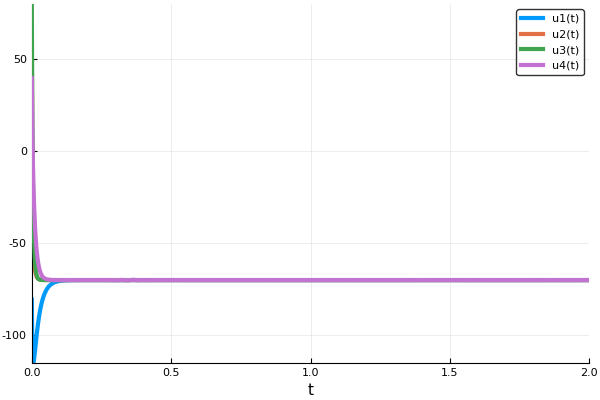

In [34]:
plot(sol, vars=[1, 2, 3, 4])

In [ ]:
workspace() 